## Regresión Logística (Clasificación)

Hablemos ahora del problema de clasificación. Es igual que el problema de regresión, salvo que los valores y que ahora queremos predecir toman sólo un pequeño número de valores discretos. Por ahora, nos centraremos en el problema de clasificación binaria en la que  𝑦
  puede tomar sólo dos valores, 0 y 1. (La mayor parte de lo que decimos aquí también se generalizará al caso de clases múltiples.) Por ejemplo, si estamos tratando de construir un clasificador de spam para el correo electrónico, a continuación,  𝑥(𝑖)
  puede ser algunas características de una pieza de correo electrónico, y  𝑦
  puede ser 1 si se trata de una pieza de correo spam, y 0 en caso contrario. El 0 también se denomina clase negativa y el 1 clase positiva, y a veces también se denotan con los símbolos "-" y "+". Dado  𝑥(𝑖)
  , la correspondiente  𝑦(𝑖)
  también se denomina etiqueta del ejemplo de entrenamiento.

In [1]:
import numpy as np

arreglo1 = np.array([1, 2, -3, 4, 5])
arreglo2 = np.array([11, 12, 13, 14, 15])

print("SUMA", np.add(arreglo1, arreglo2))
print("RESTA", np.subtract(arreglo1, arreglo2))
print("DIVSION", np.divide(arreglo1, arreglo2))
print("MULTIPLICACION", np.multiply(arreglo1, arreglo2))
print("POTENCIA", np.power(arreglo1, 2))
print("ABSOLUTO", np.absolute(arreglo1))

SUMA [12 14 10 18 20]
RESTA [-10 -10 -16 -10 -10]
DIVSION [ 0.09090909  0.16666667 -0.23076923  0.28571429  0.33333333]
MULTIPLICACION [ 11  24 -39  56  75]
POTENCIA [ 1  4  9 16 25]
ABSOLUTO [1 2 3 4 5]


In [2]:
altura = np.array([1.74, 1.8, 1.78, 1.68, 1.78, 1.7, 1.74, 1.74, 1.73, 1.79, 
           1.78, 1.72, 1.65, 1.78, 1.7, 1.68, 1.79, 1.68, 1.82, 1.72,
           1.75, 1.66, 1.67, 1.79, 1.75, 1.65, 1.78, 1.73, 1.71, 1.81,
           1.73, 1.71, 1.68, 1.74, 1.75, 1.68, 1.74, 1.81, 1.73, 1.82,
           1.8, 1.67, 1.73, 1.7, 1.73, 1.7, 1.81, 1.81, 1.76, 1.82, 1.68,
           1.74, 1.65, 1.8, 1.78, 1.7, 1.68, 1.78, 1.79, 1.73, 1.64, 1.67,
           1.69, 1.74, 1.76, 1.66, 1.66, 1.73, 1.79, 1.81, 1.78, 1.63,
           1.76, 1.72, 1.71, 1.7, 1.62, 1.8, 1.75, 1.8, 1.78, 1.78, 1.76,
           1.65, 1.65, 1.68, 1.74, 1.75, 1.69, 1.75, 1.7, 1.83, 1.64, 1.7,
           1.69, 1.69, 1.64, 1.69, 1.77, 1.8, 1.78, 1.69, 1.7, 1.7, 1.7,
           1.63, 1.73, 1.84, 1.66, 1.78, 1.8, 1.79, 1.78, 1.74, 1.77,
           1.73, 1.77, 1.76, 1.75, 1.8, 1.75,  1.8, 1.79, 1.71, 1.73,
           1.59, 1.76, 1.75, 1.71, 1.76, 1.8, 1.68, 1.74, 1.77, 1.73,
           1.68, 1.63, 1.67]);

peso = np.array([81.4, 88.7, 87.3, 62.7, 81.6, 80.9, 74.6, 84.7, 76.7, 88.3,
         84.6, 74, 57.7, 84.1, 79.7, 63.8, 88.4, 71.2, 87.1, 67, 80.7,
         74.7, 60.5, 85.9, 72.4, 59.7, 87.3, 85.7, 64.1, 91.9, 82.8, 75.7,
         60.2, 73.1, 74.7, 65.9, 80.9, 91.3, 76, 86.8, 80.7, 74.2, 83.1,
         77.8, 84.5, 58.8, 89.5, 87, 84, 89.9, 56.5, 80.2, 61.8, 86.3,
         82.6, 69.4, 65.8, 79.3, 88.1, 78.5, 69.1, 62.5, 74, 74.4, 87.6,
         59.6, 61.4, 83.2, 89.2, 89.2, 103.7, 67.9, 85.4, 69.5, 75.7, 
         83.9, 59.5, 87.9, 82.6, 88.1, 86.2, 88.9, 84.4, 58.4, 61.5, 69.2,
         84.2, 78, 81.1, 81.5, 74.7, 90.4, 59.2, 79.3, 65.1, 93, 60.5,
         76.4, 98.8, 89.1, 88.9, 61.1, 76.6, 86, 75.5, 66.9, 79.4, 87.9,
         72.3, 93.8, 89, 90.7, 86.7, 77.6, 85.1, 91.8, 103.2, 91.1, 67,
         86.9, 78.7, 87.1, 85.5, 69.8, 75, 53.9, 99, 93.7, 88, 79.4, 87.6,
         60.4, 82.7, 90.6, 79.8, 61.2, 62.5, 59.7]);

def calcular_imc(peso, altura):
    return peso / (altura*altura)

calcular_imc = np.frompyfunc(calcular_imc, 2, 1)

calcular_imc(peso, altura);


In [3]:
# Definir una función de Python simple
def my_func(x):
    return x + 1

# Crear una ufunc a partir de la función de Python (función que se aplica sobre vectores, no se requiere ciclos for)
# Función universal
ufunc = np.frompyfunc(my_func, 1, 1) # 1,1) Recibe 1 argumento, retorna 1 salida.

ufunc

<ufunc 'my_func (vectorized)'>

In [4]:
# Crear un arreglo NumPy
arr = np.array([1, 2, 3, 4])

# Aplicar la ufunc al arreglo
# ufunc = np.frompyfunc(my_func, 1, 1)
result = ufunc(arr)

print(result)

[2 3 4 5]


In [5]:
# Lista de números
numeros = [1, 2, 3, 4, 5]

# Utilizando una función lambda con map para elevar al cuadrado cada número
cuadrados = list(map(lambda x: x**2, numeros))

print(cuadrados)

[1, 4, 9, 16, 25]


<img src="img/imagen 2.png">

<img src="img/imagen.png">

<img src="img/imagen 3.png">

# x = b0 + b1*x

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Se crea una función logística vectorial (ufuncs)
logistica = np.frompyfunc(lambda b0, b1, x:                 #recibo 3 parámetros
                         1 / (1 + math.exp(-(b0 + b1*x))),  #función logaritmica
                         3, 1)                              #3 parámetros entrada, 1 salida 
logistica

<ufunc '<lambda> (vectorized)'>

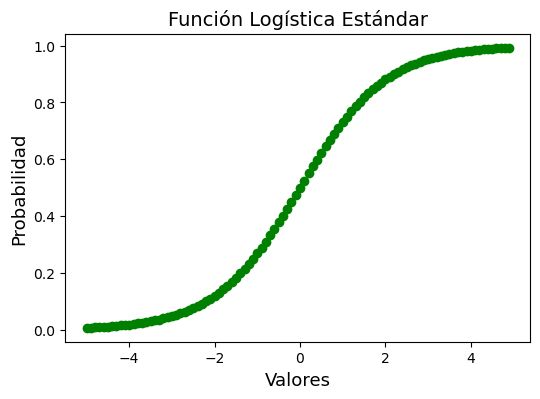

In [7]:
# Graficamos la función logística
plt.figure(figsize=(6, 4))

x = np.arange(-5, 5, 0.1)

# Primer ecuación logística
plt.scatter(np.arange(-5, 5, 0.1),
           logistica(0, 1, x),  #b0=0, b1=1
           color="green")

plt.title("Función Logística Estándar", fontsize=14.0)
plt.ylabel("Probabilidad", fontsize=13.0)
plt.xlabel("Valores", fontsize=13.0)
plt.show()

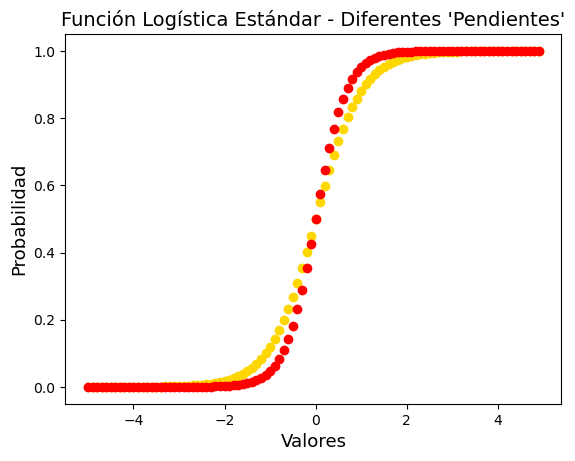

In [8]:
# Segunda ecuación logística
plt.scatter(np.arange(-5, 5, 0.1),
           logistica(0, 2, np.arange(-5, 5, 0.1)),
           color="gold")

# Tercer ecuación logística
plt.scatter(np.arange(-5, 5, 0.1),
           logistica(0, 3, np.arange(-5, 5, 0.1)),
           color="red")

plt.title("Función Logística Estándar - Diferentes 'Pendientes'", fontsize=14.0)
plt.ylabel("Probabilidad", fontsize=13.0)
plt.xlabel("Valores", fontsize=13.0)
plt.show()

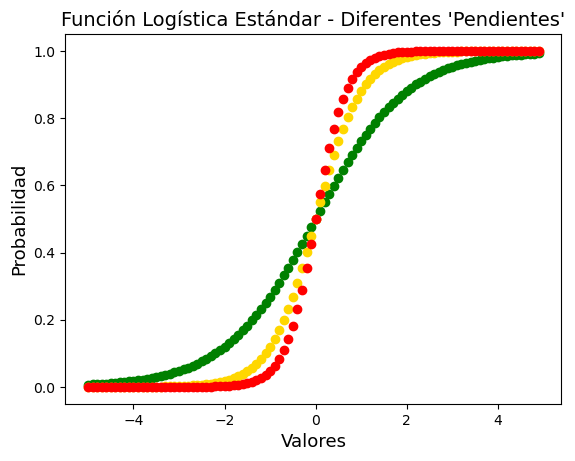

In [9]:
# Primer ecuación logística
plt.scatter(np.arange(-5, 5, 0.1),
           logistica(0, 1, np.arange(-5, 5, 0.1)),  #b0=0, b1=1
           color="green")

# Segunda ecuación logística
plt.scatter(np.arange(-5, 5, 0.1),
           logistica(0, 2, np.arange(-5, 5, 0.1)),
           color="gold")

# Tercer ecuación logística
plt.scatter(np.arange(-5, 5, 0.1),
           logistica(0, 3, np.arange(-5, 5, 0.1)),
           color="red")

plt.title("Función Logística Estándar - Diferentes 'Pendientes'", fontsize=14.0)
plt.ylabel("Probabilidad", fontsize=13.0)
plt.xlabel("Valores", fontsize=13.0)
plt.show()

# Taquicardia: Probabilidad y Clase

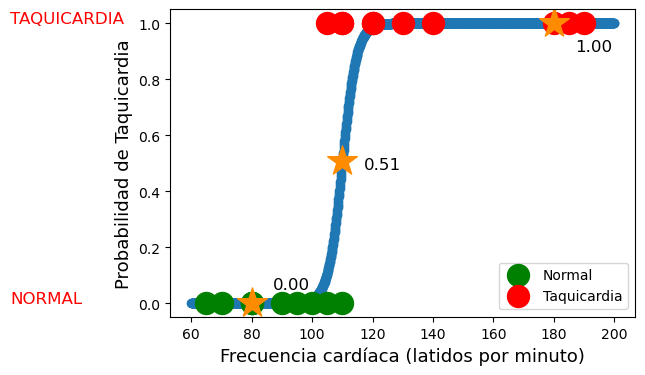

In [10]:
# Persona Normal de 60 a 100 latidos por minuto.
# Persona con Taquicardia de hasta 220 latidos por minuto.
personas_normal = [65, 70, 80, 80, 80,
                   90, 95, 100, 105, 110]

personas_taquicardia = [105, 110, 110, 120, 120,
                        130, 140, 180, 185, 190]

# Graficamos una función logística
plt.figure(figsize=(6, 4))

#Arrancamos el desarrollo del final al inicio...

# y = b0 + b1x
# y = -46.68057196 + 0.42460226x

plt.scatter(np.arange(60, 200, 0.1),              #frecuencia cardiaca 60 - 200
            logistica(-46.68057196, 0.42460226,
                      np.arange(60, 200, 0.1)))  

# Graficamos la frecuencia cardíaca de las personas 
plt.scatter(personas_normal, [0]*10, 
            marker="o", c="green", s=250, label="Normal")    
plt.scatter(personas_taquicardia, [1]*10, 
            marker="o", c="red", s=250, label="Taquicardia")    

# Graficamos las probabilidades para tres (3) individuos
individuos = [80, 110, 180]

probalidades = logistica(-46.68057196, 0.42460226, individuos) #logística es función que ya vamos a calcular


# Crear un gráfico de dispersión con estrellas como marcadores, color naranja oscuro y tamaño de 500
plt.scatter(individuos, probalidades, marker="*", c="darkorange", s=500)

# Añadir texto a la primera ubicación en el gráfico con información sobre la probabilidad
plt.text(individuos[0]+7, 0.05, "%0.2f" % probalidades[0], size=12, color="black")

# Añadir texto a la segunda ubicación en el gráfico con información sobre la probabilidad
plt.text(individuos[1]+7, 0.48, "%0.2f" % probalidades[1], size=12, color="black")

# Añadir texto a la tercera ubicación en el gráfico con información sobre la probabilidad
plt.text(individuos[2]+7, 0.90, "%0.2f" % probalidades[2], size=12, color="black")

# Añadir texto a la ubicación (0, 1) en el gráfico con la etiqueta "TAQUICARDIA"
plt.text(0, 1, "TAQUICARDIA", size=12, color="red")

# Añadir texto a la ubicación (0, 0) en el gráfico con la etiqueta "NORMAL"
plt.text(0, 0, "NORMAL", size=12, color="red")

# Etiquetar el eje y con "Probabilidad de Taquicardia" y el eje x con "Frecuencia cardíaca (latidos por minuto)"
plt.ylabel("Probabilidad de Taquicardia", fontsize=13.0)
plt.xlabel("Frecuencia cardíaca (latidos por minuto)", fontsize=13.0)

# Mostrar la leyenda en una posición específica
plt.legend(bbox_to_anchor=(1, 0.2))

# Mostrar el gráfico
plt.show()

# Máxima Verosimilitud

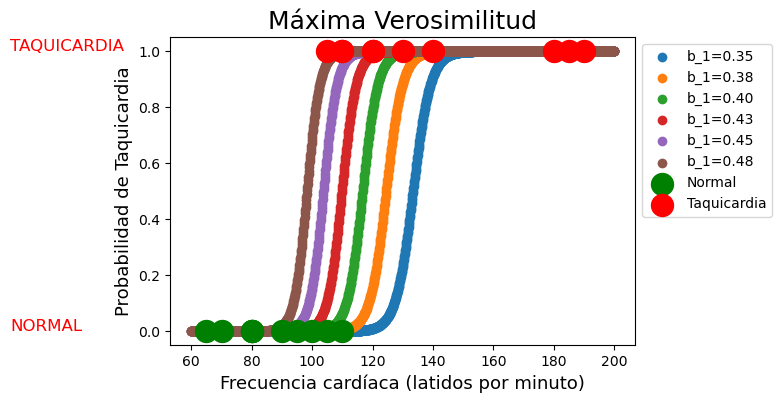

In [11]:
# Diferentes funciones logísticas con diferentes "pendientes"
plt.figure(figsize=(6, 4))

for b1 in np.arange(0.35, 0.49, 0.025):
    plt.scatter(np.arange(60, 200, 0.1), 
                logistica(-46.68057196,
                          b1,
                          np.arange(60, 200, 0.1)),
                label="b_1=%0.2f" % b1)  
   
# Graficamos la frecuencia cardíaca de las personas 
# Crear un gráfico de dispersión para personas normales con marcadores verdes y tamaño de 250
# El valor 0 en el eje y indica que todas las personas normales tienen probabilidad 0 de taquicardia
plt.scatter(personas_normal, [0]*10, marker="o", c="green", s=250, label="Normal")

# Crear un gráfico de dispersión para personas con taquicardia con marcadores rojos y tamaño de 250
# El valor 1 en el eje y indica que todas las personas con taquicardia tienen probabilidad 1 de taquicardia
plt.scatter(personas_taquicardia, [1]*10, marker="o", c="red", s=250, label="Taquicardia")

# Establecer el título del gráfico como "Máxima Verosimilitud" con tamaño de fuente 18.0
plt.title("Máxima Verosimilitud", fontsize=18.0)

# Añadir texto a la ubicación (0, 1) en el gráfico con la etiqueta "TAQUICARDIA"
plt.text(0, 1, "TAQUICARDIA", size=12, color="red")

# Añadir texto a la ubicación (0, 0) en el gráfico con la etiqueta "NORMAL"
plt.text(0, 0, "NORMAL", size=12, color="red")

# Etiquetar el eje y con "Probabilidad de Taquicardia" y el eje x con "Frecuencia cardíaca (latidos por minuto)"
plt.ylabel("Probabilidad de Taquicardia", fontsize=13.0)
plt.xlabel("Frecuencia cardíaca (latidos por minuto)", fontsize=13.0)

# Mostrar la leyenda en una posición específica
plt.legend(bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

# Modelo de Regresión Logística

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split #librería para separa datos en entrenamiento y prueba

frecuencias_cardiacas = [[65], [70], [80], [80], [80],
                         [90], [95], [100], [105], [110],
                         [105], [110], [110], [120], [120],
                         [130], [140], [180], [185], [190]]

clase = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Creamos conjuntos de entrenamiento y de prueba del modelo
datos_entrena, datos_prueba, clase_entrena, clase_prueba = \
    train_test_split(frecuencias_cardiacas,   #separa los datos de manera aleatoria
                     clase, 
                     test_size=0.30)          #30% de prueba

# Creamos el modelo de Regresión Logística
# Crear un modelo de regresión logística y entrenarlo con los datos de entrenamiento y las etiquetas de clase correspondientes.
modelo = LogisticRegression().fit(datos_entrena, clase_entrena)

# Configurar las opciones de impresión de NumPy para que los números se muestren sin notación científica.
np.set_printoptions(suppress=True)

# Imprimir las predicciones del modelo para los datos de prueba.
print(modelo.predict(datos_prueba))

[1 1 0 0 0 1]


In [13]:
# Imprimir las probabilidades de predicción del modelo para cada clase en lugar de solo las etiquetas de clase.
print(modelo.predict_proba(datos_prueba))

# Imprimir la precisión del modelo en los datos de prueba comparando las predicciones con las etiquetas reales.
print(modelo.score(datos_prueba, clase_prueba))

# Imprimir los parámetros del modelo, que son el término de intercepción (intercept_) y los coeficientes (coef_).
print(modelo.intercept_, modelo.coef_) #b0, b1

[[0.34976236 0.65023764]
 [0.00204969 0.99795031]
 [0.99956154 0.00043846]
 [0.99999326 0.00000674]
 [0.99295135 0.00704865]
 [0.0001269  0.9998731 ]]
1.0
[-30.00353175] [[0.27839651]]


# Base de datos del Titanic

In [14]:
#!pip install pydataset

In [15]:
from pydataset import data 
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
# Cargar el conjunto de datos del Titanic utilizando la función 'data' (puede ser pd.read_csv, pd.read_excel, etc. dependiendo del formato del archivo).
titanic = data('titanic')

# Mostrar las primeras filas del conjunto de datos para obtener una vista previa de los datos.
titanic

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes
...,...,...,...,...
1312,3rd class,child,women,no
1313,3rd class,child,women,no
1314,3rd class,child,women,no
1315,3rd class,child,women,no


In [17]:
titanic = pd.get_dummies(titanic, drop_first=True)
titanic

,class_2nd class,class_3rd class,age_child,sex_women,survived_yes
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
5,0,0,0,0,1
...,...,...,...,...,...
1312,0,1,1,1,0
1313,0,1,1,1,0
1314,0,1,1,1,0
1315,0,1,1,1,0


In [18]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba utilizando la función train_test_split de scikit-learn.
# Se excluye la columna 'survived_yes' del conjunto de características (X) y se asigna la variable objetivo 'survived_yes' al conjunto y.
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('survived_yes', axis=1), titanic['survived_yes'])

In [19]:
# Crear un modelo de regresión logística utilizando el solver 'lbfgs'.
modelo = LogisticRegression(solver='lbfgs') #'lbfgs' usado para la función de coste

# Ajustar el modelo utilizando los conjuntos de entrenamiento.
modelo.fit(X_train, y_train)

print("aprendiendo... ")

y_train

aprendiendo... 


1027    0
473     0
201     1
196     1
433     0
       ..
830     0
224     1
1030    0
448     0
391     0
Name: survived_yes, Length: 987, dtype: uint8

In [59]:
# class_2nd class	class_3rd class	age_child	sex_women	survived_yes
modelo.predict(np.array([[0,0,1,0]]))[0]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

In [21]:
# class_2nd class	class_3rd class	age_child	sex_women	survived_yes
modelo.predict(np.array([[0,1,0,0]]))[0]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0

In [22]:
modelo.score(X_train, y_train)

0.7730496453900709

In [23]:
# Realizar predicciones en el conjunto de entrenamiento utilizando el modelo de regresión logística.
# La expresión (modelo.predict(X_train) > .5) convierte las probabilidades de predicción en etiquetas binarias (0 o 1),
# y .astype(int) asegura que las etiquetas se representen como enteros.
prediccion = (modelo.predict(X_train) > .5).astype(int)

# Mostrar las predicciones resultantes.
prediccion

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [24]:
import pandas as pd
df = pd.DataFrame()
df

""


In [82]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Pregnancies: Número de embarazos.

- Glucose: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia a la glucosa oral.

- BloodPressure: Presión arterial diastólica (mm Hg).

- SkinThickness: Grosor del pliegue cutáneo del tríceps (mm).

- Insulin: Nivel de insulina sérica (mu U/ml).

- BMI (Body Mass Index): Índice de masa corporal.

- DiabetesPedigreeFunction: Función de pedigrí de diabetes, que proporciona una medida de la predisposición genética a la diabetes según el historial familiar.

- Age: Edad de la persona.

- Outcome: Variable objetivo que indica la presencia (1) o ausencia (0) de diabetes.


In [26]:
import pandas as pd
df = pd.DataFrame()
df

""


In [27]:
df = pd.read_csv('problemas_del_corazon.csv')
df.head()

,edad,genero,presion,colesterol,diabetico,cardiaco
0,53,0,128,216,0,1
1,53,0,138,234,0,1
2,51,0,130,256,0,1
3,66,1,120,302,0,1
4,62,1,130,231,0,1


- Edad:Representa la edad de una persona.
- Género: Indica el género o sexo de una persona. Medida: Categórica (por ejemplo, masculino/femenino).
- Presión: Presión arterial, que mide la presión de la sangre contra las paredes de las arterias. Medida: Milímetros de mercurio (mm Hg).
- Colesterol: Niveles de colesterol en la sangre, que incluyen el colesterol LDL (colesterol "malo") y el colesterol HDL (colesterol "bueno"). Medida: Miligramos por decilitro (mg/dL).
- Diabético: Indica si una persona es diabética o no. Medida: Binaria (por ejemplo, 1 para diabético, 0 para no diabético). 
- Cardíaco: Indica si una persona tiene una condición cardíaca o no. Medida: Binaria (por ejemplo, 1 para con condición cardíaca, 0 para sin condición cardíaca).